In [1]:
full_path = '/user/simon/data/soar/work/aeon/2019-08-06_rachel/RED/cfsto_0180_OGLE-2019-BLG-0747_obs1-07-08-2019.fits'

from ccdproc import CCDData

ccd = CCDData.read(full_path, unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


module://ipykernel.pylab.backend_inline


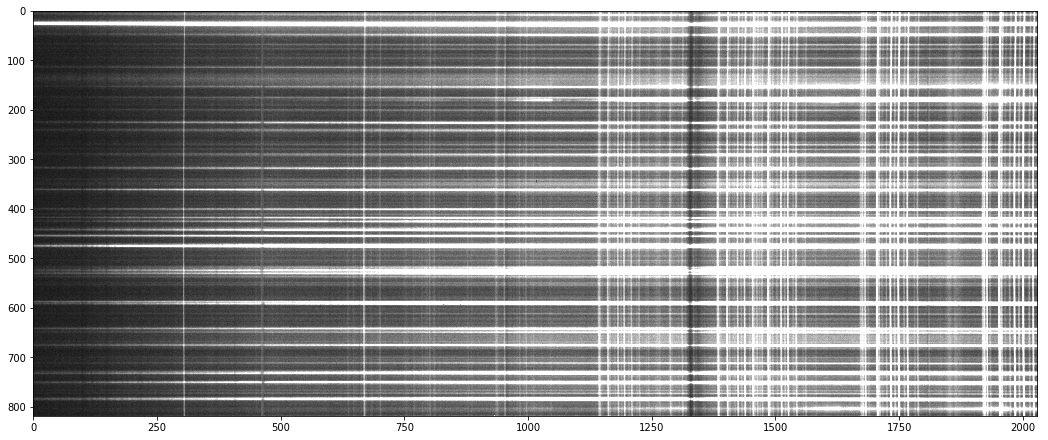

In [2]:
import matplotlib
print(matplotlib.rcParams['backend'])
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))

ax.imshow(ccd.data, cmap='gray', clim=(0, 500))
plt.show()

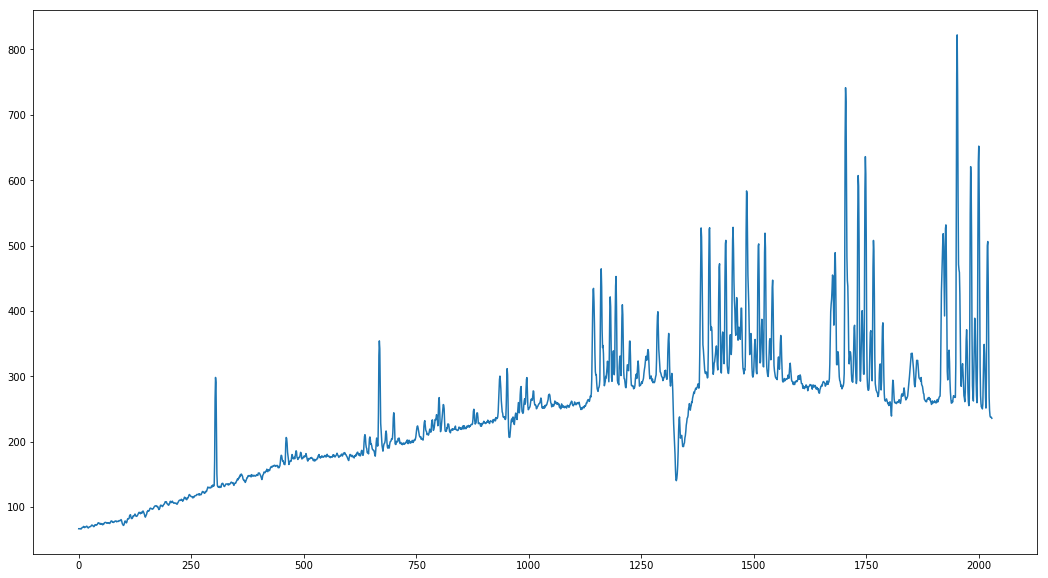

In [3]:
import numpy as np

median = np.median(ccd.data, axis=0)

fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(median)
plt.show()

In [4]:
median_subtracted = ccd.data - median[:None]

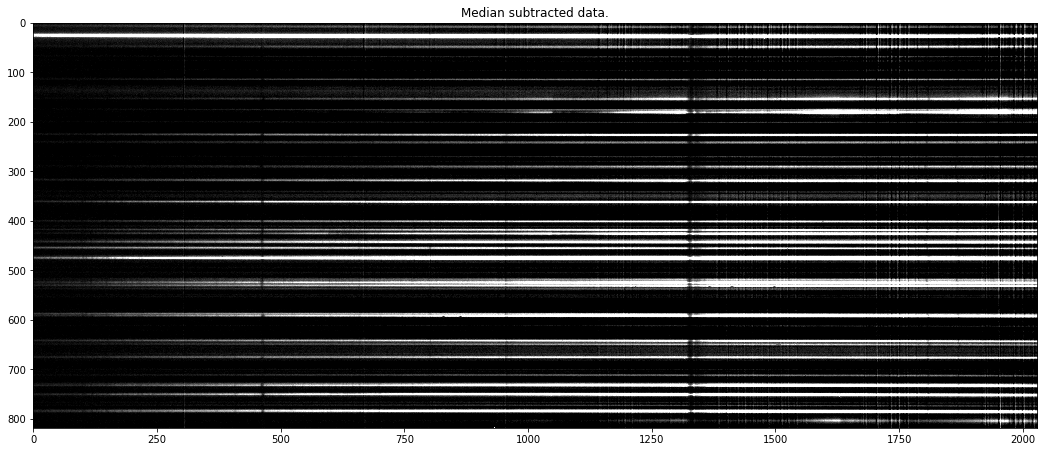

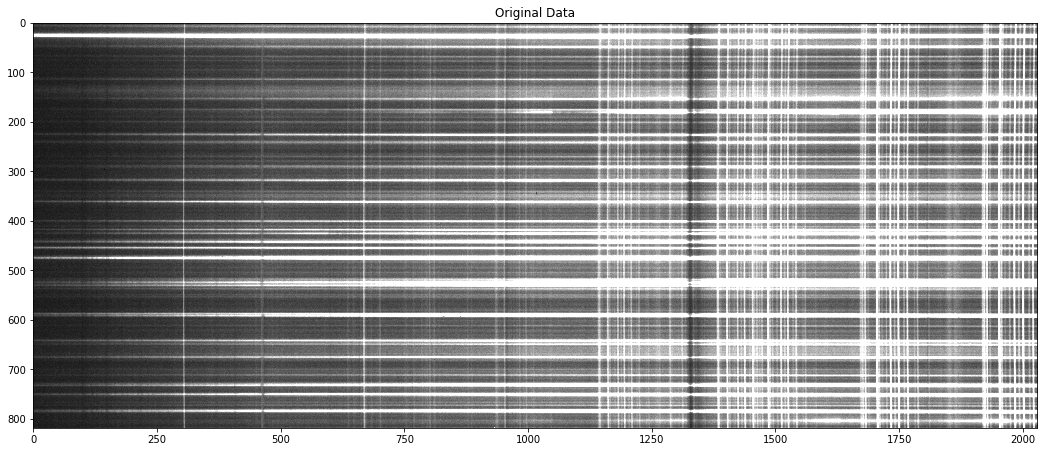

In [5]:
fig, ax = plt.subplots(figsize=(18,10))
ax.imshow(median_subtracted, cmap='gray', clim=(0, 500))
ax.set_title("Median subtracted data.")
plt.show()

fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(ccd.data, cmap='gray', clim=(0, 500))
ax.set_title('Original Data')
plt.show()

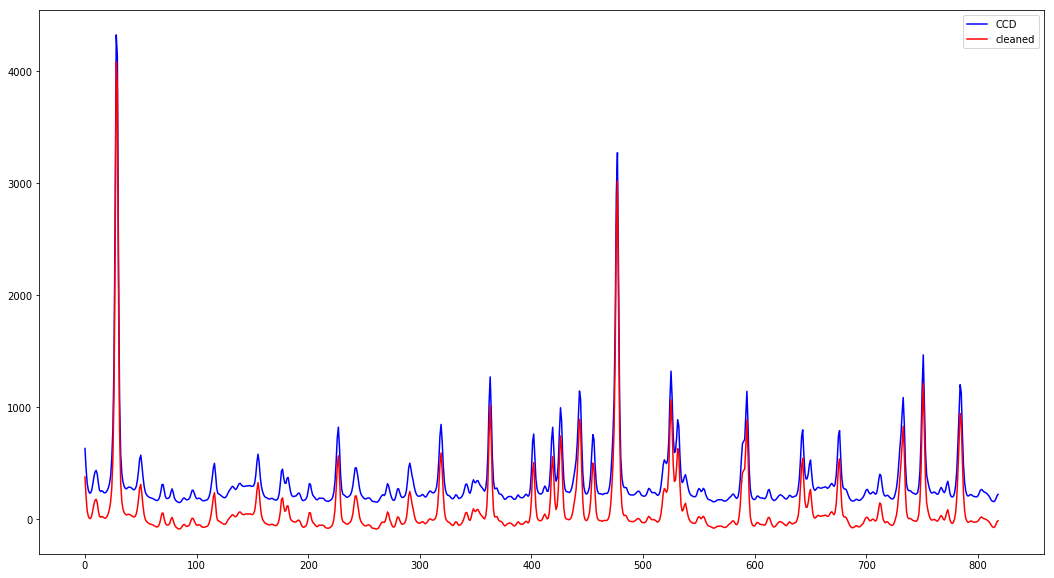

In [6]:
ccd_spatial_median = np.median(ccd.data, axis=1)
cleaned_spatial_median = np.median(median_subtracted, axis=1)

fig,ax = plt.subplots(figsize=(18, 10))

ax.plot(ccd_spatial_median, color='b', label='CCD')
ax.plot(cleaned_spatial_median, color='r', label='cleaned')
plt.legend(loc='best')
plt.show()

In [7]:
import goodman_pipeline
print(goodman_pipeline.__version__)

[17:37:25][I]: Starting Goodman HTS Pipeline Log
[17:37:25][I]: Local Time    : 2019-08-20 17:37:25.687941
[17:37:25][I]: Universal Time: 2019-08-20 21:37:25.688608
[17:37:27][I]: Pipeline Version: 1.2.1 (latest)


1.2.1


In [8]:
from goodman_pipeline.core import identify_targets

copy_ccd = ccd.copy()
copy_ccd.data = median_subtracted
identified_targets = identify_targets(ccd=copy_ccd, fit_model='gaussian', background_threshold=1, nfind=30, plots=False)


[17:37:27][I]: Searching spectroscopic targets in file: cfsto_0180_OGLE-2019-BLG-0747_obs1-07-08-2019.fits
[17:37:27][I]: Fitting Linear1D model to spatial profile to detect background shape
[17:37:27][I]: Subtracting background shape and level spatial profile for better target identification
[17:37:27][I]: Finding all peaks in spatial profile
[17:37:27][I]: Selecting the 30 most intense peaks out of 29 found
[17:37:27][I]: Validating peaks by setting threshold 1 times the background level 329.96
[17:37:27][I]: Selecting peak: Centered: 28.0 Intensity 4100.862
[17:37:27][I]: Selecting peak: Centered: 477.0 Intensity 3036.127
[17:37:27][I]: Selecting peak: Centered: 751.0 Intensity 1226.917
[17:37:27][I]: Selecting peak: Centered: 525.0 Intensity 1083.402
[17:37:27][I]: Selecting peak: Centered: 363.0 Intensity 1034.415
[17:37:27][I]: Selecting peak: Centered: 784.0 Intensity 958.443
[17:37:27][I]: Selecting peak: Centered: 443.0 Intensity 909.618
[17:37:27][I]: Selecting peak: Centered

In [9]:
print(identified_targets)

[<Gaussian1D(amplitude=4134.21127934, mean=28.38358594, stddev=1.46200744, name='Gaussian_28')>, <Gaussian1D(amplitude=2904.08863154, mean=476.61336923, stddev=1.5553344, name='Gaussian_477')>, <Gaussian1D(amplitude=1166.91327561, mean=750.87118654, stddev=1.4060056, name='Gaussian_751')>, <Gaussian1D(amplitude=681.76102986, mean=526.41210655, stddev=5.16760292, name='Gaussian_525')>, <Gaussian1D(amplitude=1006.72137823, mean=362.92855834, stddev=1.35312436, name='Gaussian_363')>, <Gaussian1D(amplitude=952.91250636, mean=784.22144802, stddev=1.73651226, name='Gaussian_784')>, <Gaussian1D(amplitude=867.66120443, mean=442.99387706, stddev=1.87227064, name='Gaussian_443')>, <Gaussian1D(amplitude=720.12321274, mean=591.97736545, stddev=2.4007108, name='Gaussian_593')>, <Gaussian1D(amplitude=771.82949279, mean=732.41932888, stddev=1.96613455, name='Gaussian_733')>, <Gaussian1D(amplitude=398.8338166, mean=423.60682216, stddev=5.64940221, name='Gaussian_426')>, <Gaussian1D(amplitude=681.73844

In [10]:
from goodman_pipeline.core import trace_targets
all_traces_cleaned = trace_targets(ccd=copy_ccd, target_list=identified_targets, nfwhm=2, plots=False)

[17:37:28][I]: Target tracing RMS error: 0.250
[17:37:28][I]: Target tracing RMS error: 0.153
[17:37:28][I]: Target tracing RMS error: 0.234
[17:37:28][I]: Target tracing RMS error: 0.000
[17:37:29][I]: Target tracing RMS error: 0.124
[17:37:29][I]: Target tracing RMS error: 0.233
[17:37:29][I]: Target tracing RMS error: 0.215
[17:37:29][I]: Target tracing RMS error: 0.404
[17:37:29][I]: Target tracing RMS error: 0.263
[17:37:29][I]: Target tracing RMS error: 3.437
[17:37:30][I]: Target tracing RMS error: 0.000
[17:37:30][I]: Target tracing RMS error: 0.164
[17:37:30][I]: Target tracing RMS error: 0.174
[17:37:30][I]: Target tracing RMS error: 0.186
[17:37:30][I]: Target tracing RMS error: 0.187
[17:37:31][I]: Target tracing RMS error: 0.169
[17:37:31][I]: Target tracing RMS error: 0.234
[17:37:31][I]: Target tracing RMS error: 0.209


In [11]:
all_traces = trace_targets(ccd=ccd, target_list=identified_targets, nfwhm=2, plots=False)

[17:37:31][I]: Target tracing RMS error: 0.273
[17:37:31][I]: Target tracing RMS error: 0.153
[17:37:31][I]: Target tracing RMS error: 0.235
[17:37:32][I]: Target tracing RMS error: 0.000
[17:37:32][I]: Target tracing RMS error: 0.125
[17:37:32][I]: Target tracing RMS error: 0.237
[17:37:32][I]: Target tracing RMS error: 0.211
[17:37:32][I]: Target tracing RMS error: 0.426
[17:37:33][I]: Target tracing RMS error: 0.264
[17:37:33][I]: Target tracing RMS error: 3.423
[17:37:33][I]: Target tracing RMS error: 0.000
[17:37:33][I]: Target tracing RMS error: 0.166
[17:37:33][I]: Target tracing RMS error: 0.179
[17:37:33][I]: Target tracing RMS error: 0.180
[17:37:34][I]: Target tracing RMS error: 0.183
[17:37:34][I]: Target tracing RMS error: 0.163
[17:37:34][I]: Target tracing RMS error: 0.229
[17:37:34][I]: Target tracing RMS error: 0.212


In [12]:
print(all_traces)

[[<Polynomial1D(2, c0=26.51526769, c1=0.00354788, c2=-0.00000128)>, <Gaussian1D(amplitude=4134.21127934, mean=28.38358594, stddev=1.46200744, name='Gaussian_28')>, OrderedDict([('GSP_TMOD', ['Polynomial1D', 'Model name used to fit trace']), ('GSP_TORD', [2, 'Degree of the model used to fit target trace']), ('GSP_TC00', [26.515267691634293, 'Parameter c0']), ('GSP_TC01', [0.003547877042450336, 'Parameter c1']), ('GSP_TC02', [-1.2825814830870674e-06, 'Parameter c2']), ('GSP_TERR', [0.27301583012822705, 'RMS error of target trace'])])], [<Polynomial1D(2, c0=475.74908588, c1=0.00097163, c2=-0.00000014)>, <Gaussian1D(amplitude=2904.08863154, mean=476.61336923, stddev=1.5553344, name='Gaussian_477')>, OrderedDict([('GSP_TMOD', ['Polynomial1D', 'Model name used to fit trace']), ('GSP_TORD', [2, 'Degree of the model used to fit target trace']), ('GSP_TC00', [475.7490858755069, 'Parameter c0']), ('GSP_TC01', [0.0009716297183988837, 'Parameter c1']), ('GSP_TC02', [-1.377104001174064e-07, 'Parame

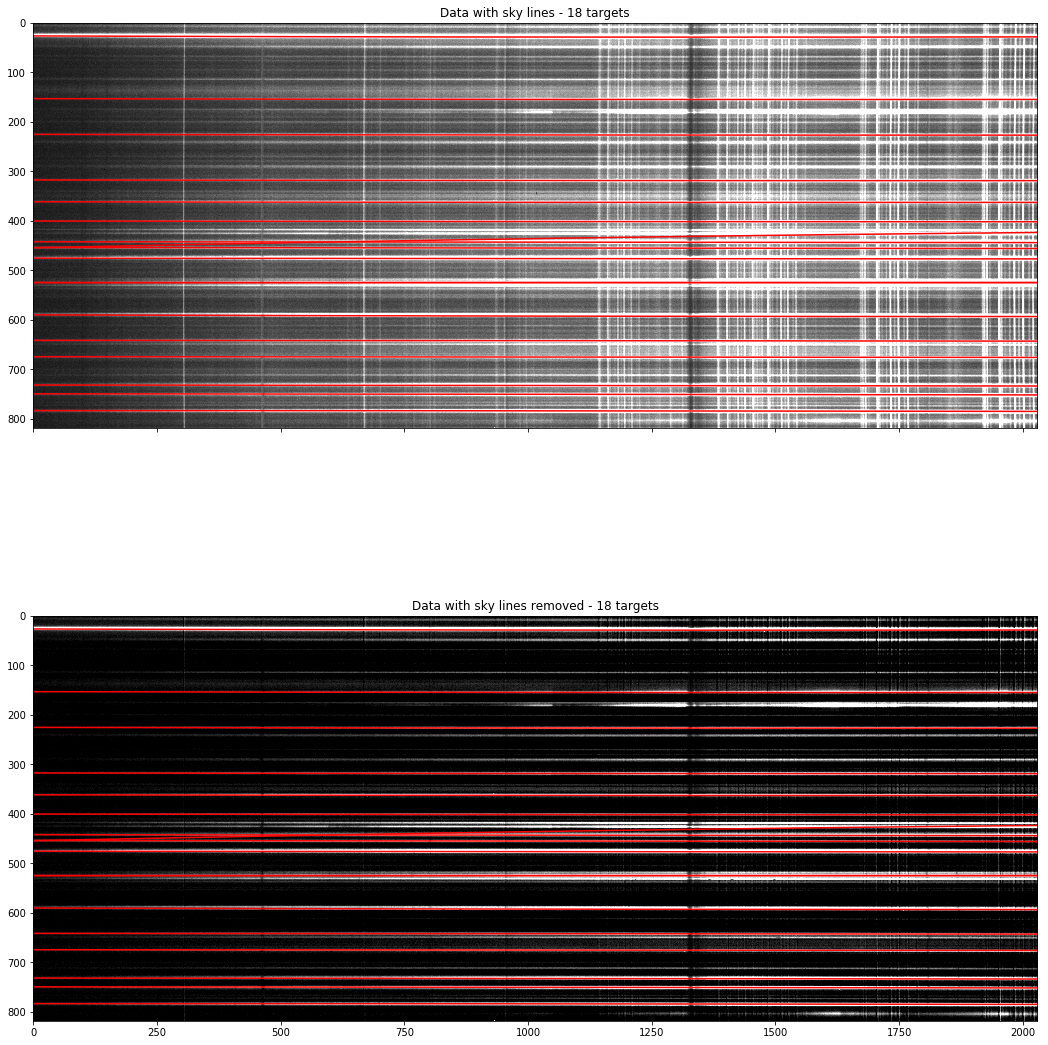

In [15]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(18, 20))
x,y = ccd.data.shape

ax1.imshow(ccd.data, cmap='gray', clim=(0, 500))
ax1.set_title("Data with sky lines - {} targets".format(len(all_traces)))
for _trace in all_traces:
    ax1.plot(range(y), _trace[0](range(y)), color='r')

ax2.imshow(copy_ccd.data,  cmap='gray', clim=(0, 500))
ax2.set_title("Data with sky lines removed - {} targets".format(len(all_traces_cleaned)))
for _ctrace in all_traces_cleaned:
    ax2.plot(range(y), _ctrace[0](range(y)), color='r')
plt.show()

# Notes

No real progress, possible tasks

- Trace sky lines curvature (not sure how it wi